/home/cristinvivian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.


0.1393686621284249 0.0015245942815274994


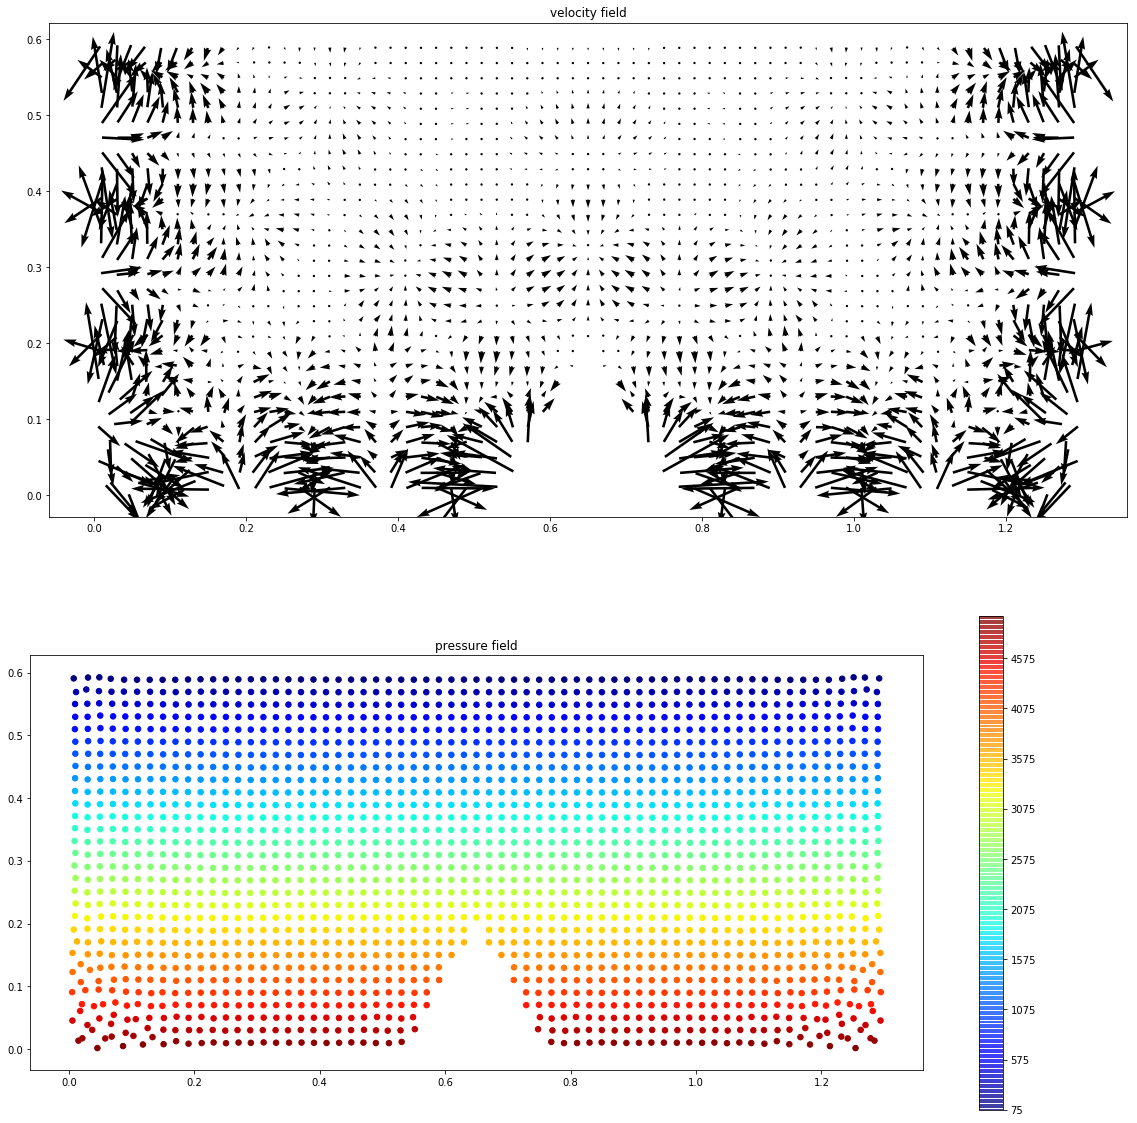

In [306]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.mlab import griddata
from numpy.random import uniform
from math import log10
from numpy import linalg as LA

npts = 1892 #total number of fluid particles
#steps=2000
xl = 1.3 #size of the domain, divided by 2
yl = 0.6

#dx = xl/np.sqrt(npts)
data1 = np.loadtxt('../data/f_xv.dat')
data0 = np.loadtxt('../data/ini_xv.dat')
data2 = np.loadtxt('../data/xv_vp.dat',skiprows=1)
data3 = np.loadtxt('../data/kernel.dat')
exdata = np.loadtxt('../data/f_state.dat')
data4 = np.loadtxt('../data/record.dat')
data5 = np.loadtxt('../data/ini_virt.dat')
data6 = np.loadtxt('../data/f_other.dat')
data7 = np.loadtxt('../data/state_vp.dat')

x0 = data0[:,1]
y0 = data0[:,2]
x2 = data1[:,1]
y2 = data1[:,2]
u2 = data1[:,3]
v2 = data1[:,4]
x3 = data2[:,1]
y3 = data2[:,2]
u3 = data2[:,3]
v3 = data2[:,4]
x5 = data5[:,1]
y5 = data5[:,2]
kernel1 = data3[:npts,1]
itype = data6[:,1]
kernel2 = data3[npts:,1]

fig, ax = plt.subplots(figsize=(20, 20))

#for i in range(20):
#    p1[i] = exdata[741+2*i,3]
#ax.set_title('wcsph results, fluid particle:%d,timestep:%d'%(npts,steps))
#init = plt.subplot(121,aspect=1.0)
#for i in range(len(x2)):
#    if itype[i]==2:
#        init.plot(x2[i],y2[i],'.r')
#    else:
#        init.plot(x2[i],y2[i],'.b')
#for i in range(len(x2)):
#    if x2[i]<=1.04:
#        init.plot(x2[i],y2[i],'.b')
#init.plot(x0,y0,'.b',x5,y5,'.r')

#init.set_title('particle position')

#hp = 0.
pressure = exdata[:,3]
pvp = data7[:,3]
hydro = exdata[:,3]
velocity = np.zeros(len(y2))
#normarlized pressure
for i in range(len(y2)):
    hydro[i] = 9.8*1000*(yl-y2[i])
    velocity[i] = np.sqrt(u2[i]**2+v2[i]**2)
    
density = exdata[:,2]
energy = exdata[:,4]
xi = np.linspace(0,xl,52)
yi = np.linspace(0,yl,52)
#m=np.log10(pressure)
# grid the data.
zi = griddata(x2,y2,pressure,xi,yi,interp='linear')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.subplot(212,aspect=1.0)
#im2 = CS.plot(x2,y2,10,pressure,cmap='jet')
#im2 = CS.contour(xi,yi,zi,200,cmap=plt.cm.jet)
CS.scatter(x2,y2,30,pressure,cmap='jet')
#fmt = ticker.LogFormatterMathtext()
#fmt.create_dummy_axis()
#CS.clabel(im2, im2.levels[::2])
fig.colorbar(im2,ax=CS,pad=0.05)
CS.set_title('pressure field') #both contour & scatter are used

#ccs = plt.subplot(223, aspect =1.0)
#im3 = ccs.scatter(x2,y2,10,kernel1)
#ccs.scatter(x3,y3,10,kernel2)
#ccs.set_title('kernel scatter')

vel = plt.subplot(211,aspect=1.0)
vel.quiver(x2,y2,u2,v2)
#vel.scatter(x2,y2,80,velocity,cmap='jet')
#vel.quiver(x3,y3,u3,v3)
vel.set_title('velocity field')

# write pressure at the center line into txtfile
err_p = LA.norm(hydro-pressure)
err_v = LA.norm(u2**2+v2**2)/np.sqrt(npts)
err_d = LA.norm(abs(y2-y0))/np.sqrt(npts)
print(err_v,err_d)

#p3 = []
#p1 = pressure[78:91]
#print(len(p1))
#p2 = pressure[338:364]
#for i in range(26):
#    p3.append((p1[i]+p2[i])/2)

#mat = np.matrix(p1)
#with open('outfile-2.txt','ab') as f:   
#    for line in mat:
#        np.savetxt(f,line,fmt='%.2f')
        #f.write("%r %r %r\n"%((dx,fmt='%.5f'),(err_p,fmt='%.5f'),(err_d,fmt='%.5f')))

#den = plt.subplot(313,aspect=1.0)
#for i in range(len(x2)):
#    if density[i]<=1000:
#        den.scatter(x2[i],y2[i],density[i]/10)
#im3=den.scatter(x2,y2,10,density)
#fig.colorbar(ax=den,pad=0.05)

#den = plt.subplot(224)
#zii = griddata(x2,y2,pressure,xi,yi,interp='linear')
#im3 = den.contour(xi,yi,zii,200,cmap=plt.cm.jet)
#fig.colorbar(im3, ax =den,pad=0.05)
#den.set_title('density field')

/home/cristinvivian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.
  This is separate from the ipykernel package so we can avoid doing imports until


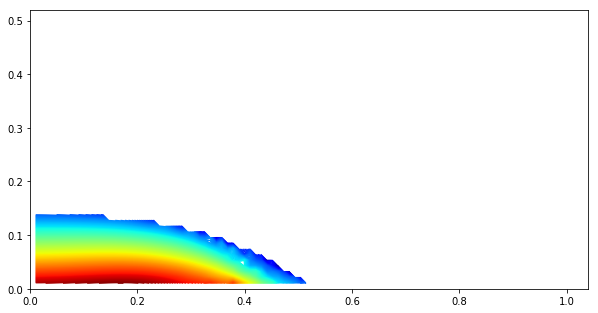

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
CS = plt.subplot(111,aspect=1.0)
zii = griddata(x2,y2,pressure,xi,yi,interp='linear')
image = plt.contour(xi,yi,zii,200,cmap=plt.cm.jet)
#image.figuresize(20,20)
#fig.colorbar(image,ax = CS,pad=0.05)
    
#print(pressure)

In [13]:
help scatter

SyntaxError: invalid syntax (<ipython-input-13-9e83b9f4772d>, line 1)

5096.0
[0.01711679 0.017307   0.06097808 0.1124747 ]


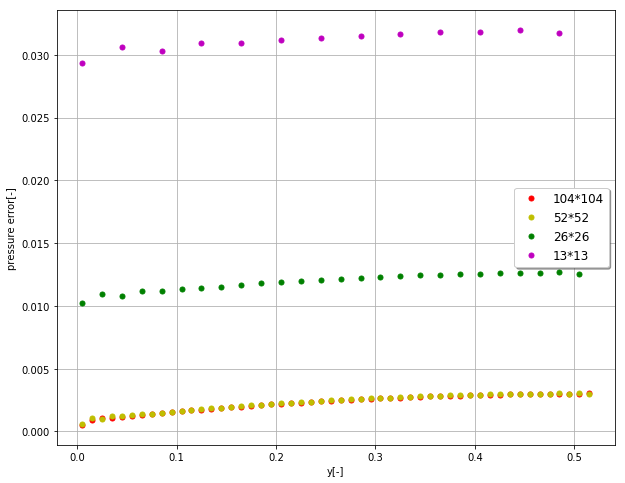

In [227]:
import csv
from locale import *

a = np.arange(0.005,0.520,0.01)
b = np.arange(0.005,0.385,0.02)

p0 = np.zeros((4,52))
pc1 = []
pc2 = []
pc3 = []
pc4 = []
p_err = np.zeros((4,52))
hp = 9.8*1000*0.52
print(hp)
tt = [0.08,0.12,0.16,0.20,0.40]
for i in range(len(tt)-1):
    cita = 0.5*(np.sin((tt[i]/0.2-0.5)*np.pi)+1)
    for j in range(52):
        p0[i,j] = cita*(yl-a[j])/yl

pp = np.loadtxt('outfile.txt') #pressure at centerline at different steps, dummy boundary, normalized
ppp = np.loadtxt('outfile-1.txt') #pressure at centerline at stable point, 3 boundary conditions
line_num = 0
with open('outfile-2.txt','r') as fin:
#    reader=csv.reader(fin)
    for line in fin:
        line_num += 1
        if line_num == 1:
            for s in line.split():
                pc1.append(float(s))
        elif line_num == 4:
            for s in line.split():
                pc2.append(float(s))
        elif line_num == 5:
            for s in line.split():
                pc3.append(float(s))
        elif line_num == 7:
            for s in line.split():
                pc4.append(float(s))
#    reader=csv.reader(fin)
#print(pc1) 
#print(p0[3,:])
#    pc2 = np.array([[parseNumber(s) for s in row] for i,row in enumerate(reader) if i==1])
#    pc3 = np.array([[parseNumber(s) for s in row] for i,row in enumerate(reader) if i==4])
#    pc4 = np.array([[parseNumber(s) for s in row] for i,row in enumerate(reader) if i==6])
#coef = ppp[3,0]/(hp*p0[3,0])
#print(len(pcc[0,:]))
#b = y2[391:431:2]
#    np.savetxt(f,p2,fmt='%.2f')
#for i in range(51):
p_err[0,:]=abs(pc1-(hp*p0[3,:]+2.5*9.8))/hp #104*104
p_err[1,:]=abs(pc2-hp*p0[3,:])/hp #52*52    
p_err[2,0:52:2]=abs(pc3[:]-hp*p0[3,1:52:2])/hp #26*26
p_err[3,0:52:4]=abs(pc4[:]-hp*p0[3,3:52:4])/hp #13*13

#print(sum(p_err[0,:])/20,sum(p_err[]))
norm = LA.norm(p_err,axis=1)
#norm2 = []
#norm2 = np.avg(p_err,axis=1)
print(norm)

#print(norm2)
gfig, ax = plt.subplots(figsize=(10,8))
#ax.plot(a,pp[0,:],'.b',label='0.08s')
#ax.plot(a,pp[1,:],'r^',label='0.12s')
#ax.plot(a,pp[2,:],'y8',label='0.16s')
#ax.plot(a,p_err[0,:],'g',marker='o',markersize='10',label='dummy boundary')
#ax.plot(a,pp[4,:],'m*',label='0.40s')
#ax.plot(a,p_err[1,:],'y',marker='^',markersize='6',label='dynamic boundary')
ax.plot(a,p_err[0,:],'.r',markersize='10',label='104*104')
ax.plot(a,p_err[1,:],'.y',markersize='10',label='52*52')
ax.plot(a[0:52:2],p_err[2,0:52:2],'.g',markersize='10',label='26*26')
ax.plot(a[0:52:4],p_err[3,0:52:4],'.m',markersize='10',label='13*13')
#for i in range(3):
#    ax.plot(b,p0[i,:],'k')
#ax.plot(b,p0[3,:],'k',label='hydrostatic')
legend = ax.legend(loc='best', shadow=True, fontsize='large')
plt.grid(True)
plt.ylabel('pressure error[-]')
plt.xlabel('y[-]')

plt.show()


Text(0, 0.5, 'av_vel')

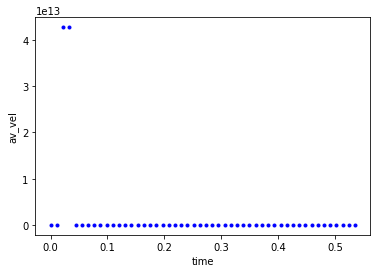

In [277]:
dt = 1.071e-4
#damp = 2500*dt
time = np.linspace(dt,5000*dt,50)
#tsuita = 0.5*np.sin((time/damp-0.5)*np.pi)+0.5
pcenter = data4[:50,1]
#pedge = pressure[0:39]
av_vel = data4[:50,2]
cor_vel = data4[:,3]
plt.plot(time,av_vel,'.b')
plt.xlabel('time')
plt.ylabel('av_vel')
#plt.title('c_0=20*(gH)**(1/2)')
#print(t)

Text(0.5, 1.0, 'pressure distribution in y-direction')

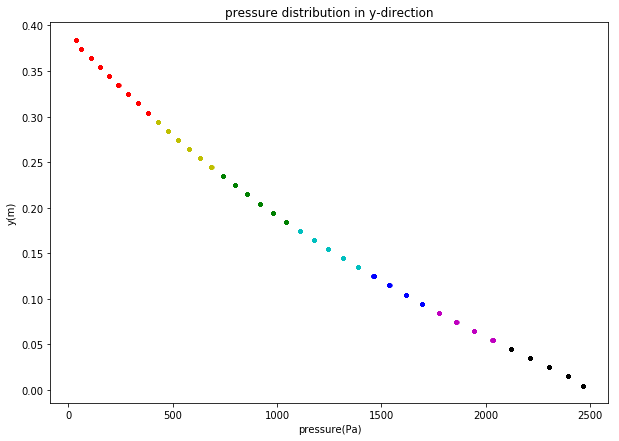

In [36]:
color = ['r.','y.','g.','c.','b.','m.','k.','w.']
fig, ax = plt.subplots(figsize=(10, 7))
m = len(color)
maxp = max(pressure)
minp = min(pressure)

pmap = np.linspace(minp,maxp,m)
for i in range(len(pressure)):
    for j in range(m-1):
        if (pressure[i]<pmap[j+1]) & (pressure[i]>=pmap[j]):
            ax.plot(pressure[i],y2[i],color[j])
            
#fig.colorbar(ax,mappable,pad=0.05)
plt.xlabel('pressure(Pa)')
plt.ylabel('y(m)')
ax.set_title('pressure distribution in y-direction')

In [279]:
print(15*np.sqrt(9.8*0.52))

33.861482542853906


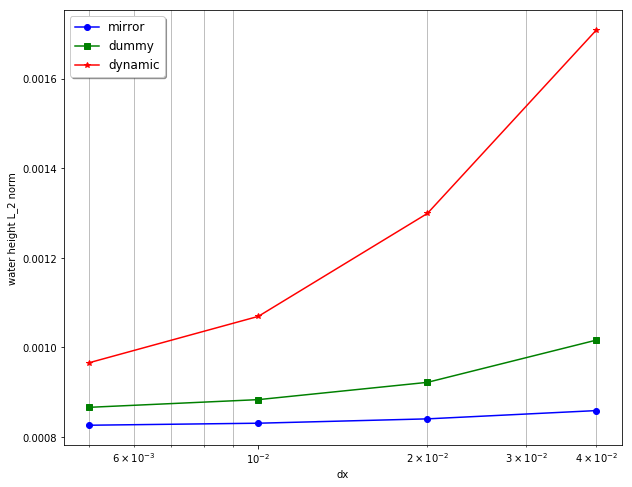

In [289]:
from matplotlib.ticker import NullFormatter

#x  = np.linspace(0.005,0.04,0.005)


dx  = [0.005,0.01,0.02,0.04]
y1 = [0.001,0.002,0.004,0.008]
y2 = [1e-3,4e-3,1.6e-2,6.4e-2]
d_mirror = [8.2619e-4,8.307115e-4,8.40423e-4,8.58925e-4]
d_dummy = [2.232423e-3,2.210936e-3,2.438781e-3,2.609608e-3]
d_dummy_new = [8.662157e-4  ,8.83386e-4,9.2201e-4,1.01648e-3 ]
d_dynamic = [9.65893e-4,1.069439e-3,1.29942e-3,1.70955e-3]
v_mirror = [7.8137618e-7,5.9766538e-7,4.3183004e-7,2.9720636e-7]

gfig, ax = plt.subplots(figsize=(10,8))
ax.plot(dx,d_mirror,'b',marker='o',label='mirror')
ax.plot(dx,d_dummy_new,'g',marker='s',label='dummy')
ax.plot(dx,d_dynamic,'r',marker='*',label='dynamic')
#ax.plot(dx,y1,'-.k',label='frist order conv')
#ax.plot(dx,y2,'--k',label='second order conv')
plt.xscale('log')
legend = ax.legend(loc='best', shadow=True, fontsize='large')
#plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('water height L_2 norm')
#ax.set_title('pressure distribution in y-direction')
plt.grid(True,'minor')

In [298]:
print(9800*0.6)

5880.0
